In [1]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/Users/oreayoisrael-bolarinwa/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('diabetes_data.csv')

In [3]:
df.head()

,gender,age,hypertension,diabetes_pedigree_function,diet_type,star_sign,BMI,weight,family_diabetes_history,social_media_usage,physical_activity_level,sleep_duration,stress_level,pregnancies,alcohol_consumption,diabetes
0,female,NaN,NaN,0.37,paleo,NaN,NaN,197.7,NaN,Occasionally,Sedentary,1.5,Low,NaN,light,1.0
1,male,59.0,0.0,0.73,NaN,Leo,17.1,156.5,0.0,Occasionally,Lightly Active,5.4,Moderate,0.0,none,1.0
2,female,31.0,NaN,NaN,NaN,NaN,22.5,137.8,NaN,Occasionally,Lightly Active,7.6,Low,0.0,light,1.0
3,female,81.0,1.0,0.37,pescatarian,NaN,NaN,108.2,0.0,NaN,Sedentary,7.7,Low,1.0,heavy,NaN
4,NaN,64.0,0.0,0.55,carnivore,NaN,NaN,179.7,NaN,Occasionally,Sedentary,7.8,NaN,0.0,heavy,1.0


In [4]:
# number of rows in dataset

print(f'number of rows: {len(df)}')

number of rows: 100000


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      79954 non-null  object 
 1   age                         80145 non-null  float64
 2   hypertension                80169 non-null  float64
 3   diabetes_pedigree_function  80120 non-null  float64
 4   diet_type                   79939 non-null  object 
 5   star_sign                   79806 non-null  object 
 6   BMI                         79934 non-null  float64
 7   weight                      80126 non-null  float64
 8   family_diabetes_history     79863 non-null  float64
 9   social_media_usage          79968 non-null  object 
 10  physical_activity_level     80032 non-null  object 
 11  sleep_duration              80063 non-null  float64
 12  stress_level                80024 non-null  object 
 13  pregnancies                 80

In [6]:
# immediately remove rows that don't have a value for diabetes 

diabetes_data = df[df['diabetes'].isnull() == False]

In [7]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 80242 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      64068 non-null  object 
 1   age                         64265 non-null  float64
 2   hypertension                64333 non-null  float64
 3   diabetes_pedigree_function  64270 non-null  float64
 4   diet_type                   64163 non-null  object 
 5   star_sign                   63962 non-null  object 
 6   BMI                         64080 non-null  float64
 7   weight                      64313 non-null  float64
 8   family_diabetes_history     64029 non-null  float64
 9   social_media_usage          64112 non-null  object 
 10  physical_activity_level     64175 non-null  object 
 11  sleep_duration              64259 non-null  float64
 12  stress_level                64291 non-null  object 
 13  pregnancies                 64237 no

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,80145.0,45.107306,18.550434,18.0,27.00,45.0,60.00,91.0
hypertension,80169.0,0.202248,0.401678,0.0,0.00,0.0,0.00,1.0
diabetes_pedigree_function,80120.0,0.500877,0.173783,0.2,0.35,0.5,0.65,0.8
BMI,79934.0,26.978545,6.005039,1.8,22.90,27.0,31.00,53.1
weight,80126.0,150.526618,57.731539,50.0,100.30,150.9,200.40,250.0
family_diabetes_history,79863.0,0.302167,0.459200,0.0,0.00,0.0,1.00,1.0
sleep_duration,80063.0,5.295149,2.842133,0.0,3.30,5.3,7.00,12.0
pregnancies,80033.0,0.758212,1.281326,0.0,0.00,0.0,1.00,5.0
diabetes,80242.0,0.954936,0.207445,0.0,1.00,1.0,1.00,1.0


In [9]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,64265.0,45.084930,18.534863,18.0,27.00,45.0,60.00,91.0
hypertension,64333.0,0.201359,0.401018,0.0,0.00,0.0,0.00,1.0
diabetes_pedigree_function,64270.0,0.501592,0.173897,0.2,0.35,0.5,0.65,0.8
BMI,64080.0,26.975354,6.005087,1.8,22.90,27.0,31.00,52.9
weight,64313.0,150.534687,57.759211,50.0,100.20,150.8,200.50,250.0
family_diabetes_history,64029.0,0.302379,0.459292,0.0,0.00,0.0,1.00,1.0
sleep_duration,64259.0,5.300389,2.838889,0.0,3.40,5.3,7.00,12.0
pregnancies,64237.0,0.757632,1.280677,0.0,0.00,0.0,1.00,5.0
diabetes,80242.0,0.954936,0.207445,0.0,1.00,1.0,1.00,1.0


#### The comparision of data description pre and post diabetes null removal shows no significant changes.

In [10]:
df.isnull().sum()

gender                        20046
age                           19855
hypertension                  19831
diabetes_pedigree_function    19880
diet_type                     20061
star_sign                     20194
BMI                           20066
weight                        19874
family_diabetes_history       20137
social_media_usage            20032
physical_activity_level       19968
sleep_duration                19937
stress_level                  19976
pregnancies                   19967
alcohol_consumption           20104
diabetes                      19758
dtype: int64

In [11]:
diabetes_data.isnull().sum()

gender                        16174
age                           15977
hypertension                  15909
diabetes_pedigree_function    15972
diet_type                     16079
star_sign                     16280
BMI                           16162
weight                        15929
family_diabetes_history       16213
social_media_usage            16130
physical_activity_level       16067
sleep_duration                15983
stress_level                  15951
pregnancies                   16005
alcohol_consumption           16147
diabetes                          0
dtype: int64

In [12]:
list(df.columns)

['gender',
 'age',
 'hypertension',
 'diabetes_pedigree_function',
 'diet_type',
 'star_sign',
 'BMI',
 'weight',
 'family_diabetes_history',
 'social_media_usage',
 'physical_activity_level',
 'sleep_duration',
 'stress_level',
 'pregnancies',
 'alcohol_consumption',
 'diabetes']

In [13]:
def return_value_counts(col, df):
    
    value_counts = df[col].value_counts().rename_axis('unique_values').reset_index(name='counts')
    
    return value_counts


In [14]:
categorical_cols = ['gender', 'diet_type', 'star_sign', 
                    'social_media_usage', 'physical_activity_level',
                   'alcohol_consumption']

for col in categorical_cols:
    
    print(col, '\n')
    
    print(f'unique values: {list(diabetes_data[col].unique())}\n')
    
    x = return_value_counts(col, diabetes_data)
    
    print(x, '\n')
    
    print(f'nulls: {diabetes_data[col].isnull().sum()}\n')
     
    

gender 

unique values: ['female', 'male', nan]

  unique_values  counts
0          male   35252
1        female   28816 

nulls: 16174

diet_type 

unique values: ['paleo', nan, 'carnivore', 'low carb', 'vegetarian', 'mediterranean', 'raw food', 'vegan', 'ketogenic', 'pescatarian', 'gluten free', 'atkins', 'weight watchers']

      unique_values  counts
0       pescatarian    5417
1            atkins    5408
2     mediterranean    5399
3        vegetarian    5369
4          raw food    5354
5         ketogenic    5354
6         carnivore    5352
7   weight watchers    5350
8             vegan    5340
9       gluten free    5340
10         low carb    5244
11            paleo    5236 

nulls: 16079

star_sign 

unique values: [nan, 'Leo', 'Capricorn', 'Scorpio', 'Virgo', 'Taurus', 'Cancer', 'Libra', 'Aries', 'Gemini', 'Aquarius', 'Pisces', 'Sagittarius']

   unique_values  counts
0    Sagittarius    5430
1         Cancer    5401
2         Gemini    5362
3        Scorpio    5350
4      

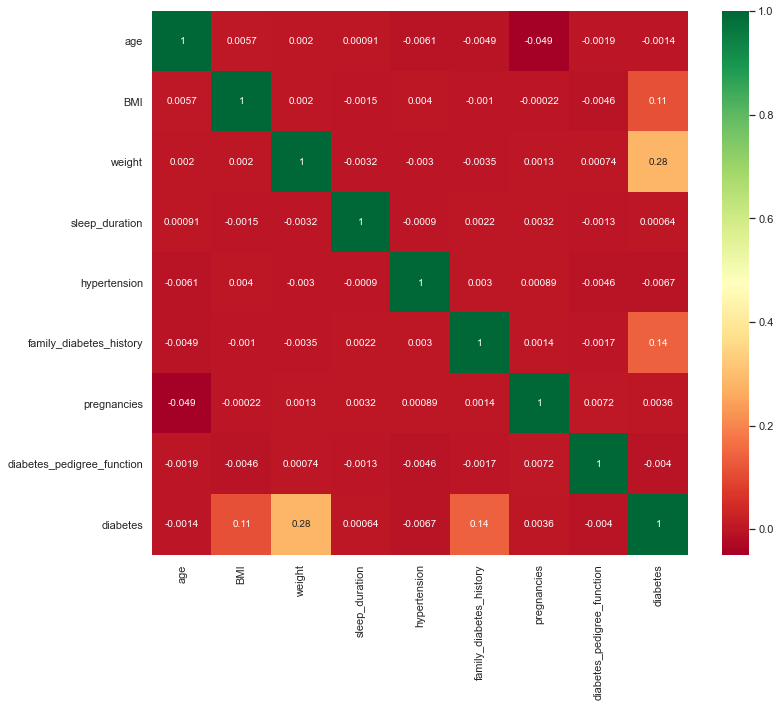

In [15]:
df_numeric = ['age', 'BMI', 'weight', 'sleep_duration',
             'hypertension', 'family_diabetes_history', 'pregnancies',
             'diabetes_pedigree_function', 'diabetes']

plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df[df_numeric].corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

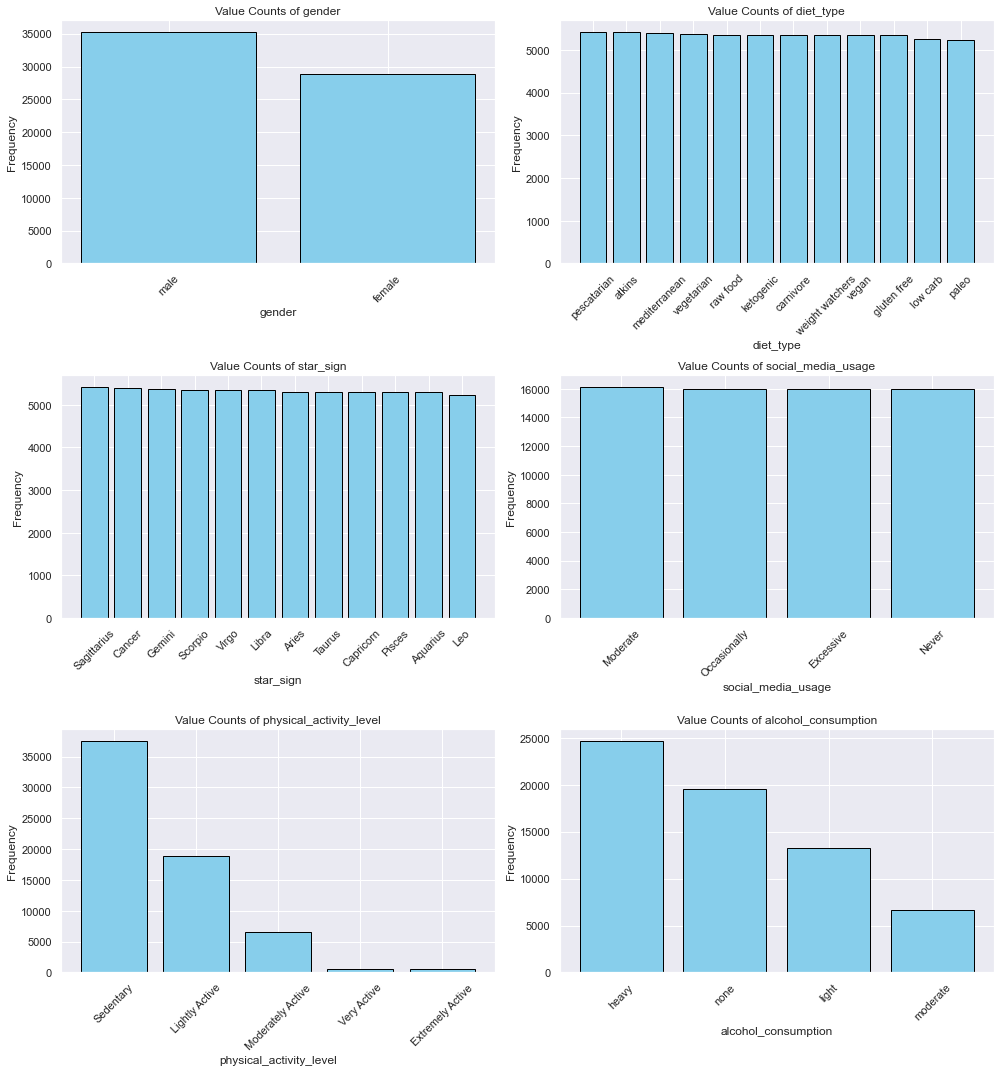

In [16]:
# Filter for only categorical columns
num_columns = len(categorical_cols)
num_rows = (num_columns + 1) // 2  # Adjust to fit in a grid

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))
axes = axes.ravel()  # Flatten the array for easy iteration

# Plot value counts for each categorical column
for i, col in enumerate(categorical_cols):
    value_counts = diabetes_data[col].value_counts()
    axes[i].bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Value Counts of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticklabels(value_counts.index, rotation=45)  # Rotate labels for readability

# Hide any extra subplots if the number of columns is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

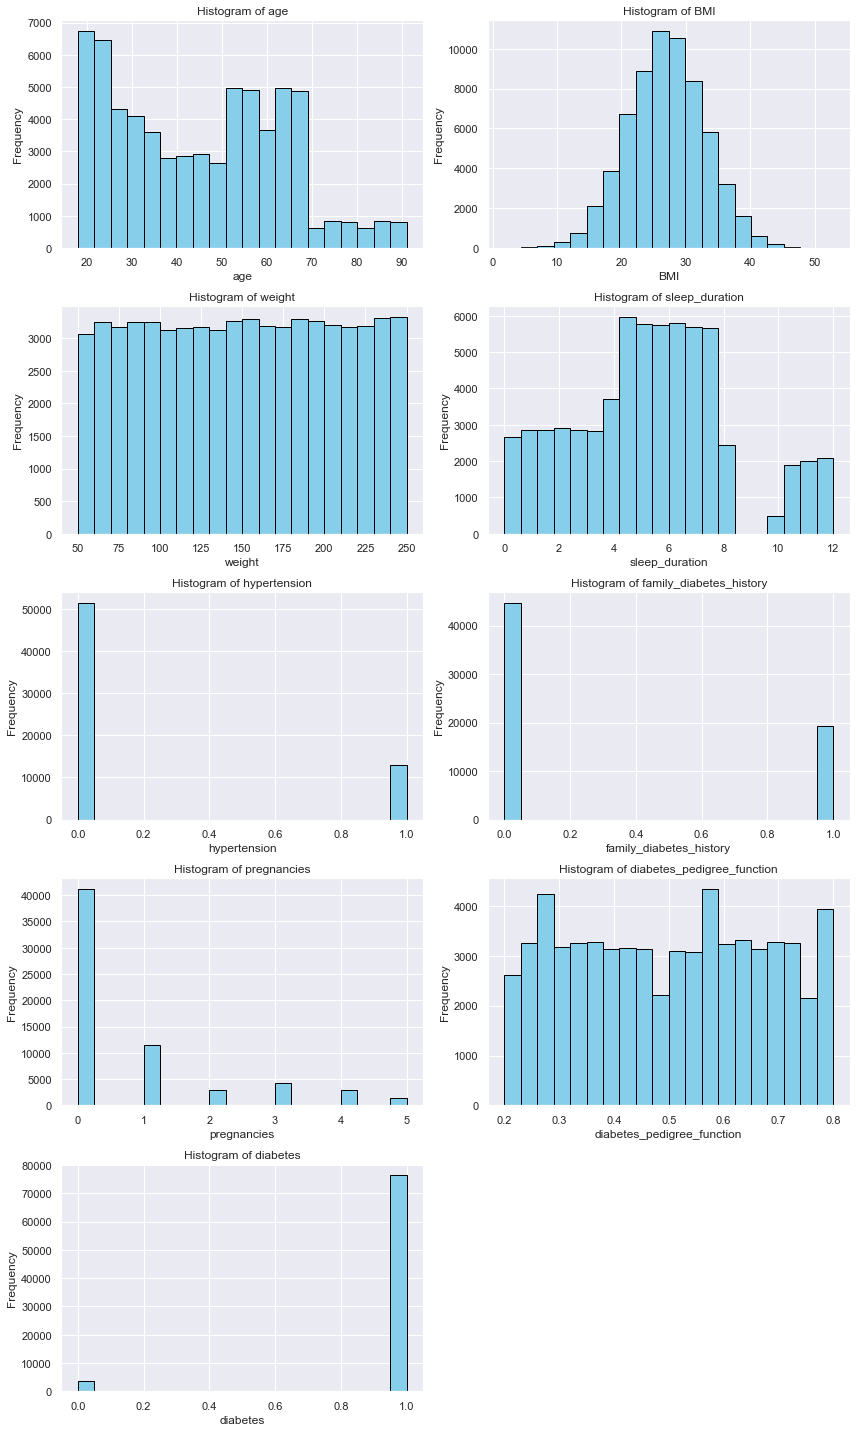

In [17]:
df_numeric = ['age', 'BMI', 'weight', 'sleep_duration',
             'hypertension', 'family_diabetes_history', 'pregnancies',
             'diabetes_pedigree_function', 'diabetes']

num_columns = len(df_numeric)

num_rows = (num_columns + 1) // 2  # to set up a grid layout

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))
axes = axes.ravel()  # Flatten the axes array for easy iteration


# Plot each column's histogram
for i, col in enumerate(df[df_numeric]):
    # Drop non-numeric columns to avoid errors in plotting
    if pd.api.types.is_numeric_dtype(df[col]):
        axes[i].hist(diabetes_data[col].dropna(), bins=20, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    else:
        axes[i].text(0.5, 0.5, f"{col} is non-numeric", ha='center', va='center')
        axes[i].set_title(f'{col} (non-numeric)')
        axes[i].set_xticks([])
        axes[i].set_yticks([])

# Hide any extra subplots if the number of columns is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


#### Notes:

    - diabetes_pedigree_function is fairly uniformally distributed
    - sleep_duration, histogram, is skewed
    - BMI is normally distributed

- Missing values will be replace with median for skewed features

- Mean will be applied for uniformly distributed features

- Binary values missing will be replaced by random sampling to maintain the current proportions and reduce the likelihood of bias. 

- Missing Categorical values will be replaced by "Unknown"


In [18]:
new_data = diabetes_data

#### Dealing with Outliers (e.g. sleep_duration, weight, BMI)

For continuous values, we will apply capping/flooring techniques. Replacing outliers with the nearest acceptable value (e.g., 5th and 95th percentiles).

In [19]:
# sleep_duration outliers

upper_bound = new_data['sleep_duration'].quantile(0.85)

lower_bound = new_data['sleep_duration'].quantile(0.15)

print(f'sleep_duration 80th Percentile: {upper_bound} \n')
    
print(f'sleep_duration 20th Percentile: {lower_bound} \n')

new_data['sleep_duration'] = new_data['sleep_duration'].clip(lower=lower_bound, upper=upper_bound)

sleep_duration 80th Percentile: 7.7 

sleep_duration 20th Percentile: 2.0 



In [20]:
# BMI outliers

upper_bound = new_data['BMI'].quantile(0.99)

lower_bound = new_data['BMI'].quantile(0.01)

print(f'BMI 95th Percentile: {upper_bound} \n')
    
print(f'BMI 5th Percentile: {lower_bound} \n')

new_data['BMI'] = new_data['BMI'].clip(lower=lower_bound, upper=upper_bound)

BMI 95th Percentile: 40.9 

BMI 5th Percentile: 12.9 



In [21]:
new_data[['sleep_duration', 'BMI']].describe().T

,count,mean,std,min,25%,50%,75%,max
sleep_duration,64259.0,5.109715,2.016093,2.0,3.4,5.3,7.0,7.7
BMI,64080.0,26.976412,5.897806,12.9,22.9,27.0,31.0,40.9


In [22]:
df[['sleep_duration', 'BMI']].describe().T

,count,mean,std,min,25%,50%,75%,max
sleep_duration,80063.0,5.295149,2.842133,0.0,3.3,5.3,7.0,12.0
BMI,79934.0,26.978545,6.005039,1.8,22.9,27.0,31.0,53.1


#### Dealing with Missing Values

In [23]:
# Numerical Columns with Ordinal Values 

# Approach: Use the median to fill missing values, as it’s less sensitive to outliers.

cols = ['BMI', 'age', 'sleep_duration', 'weight']

for col in cols:
    
    new_data[col].fillna(new_data[col].median(), inplace=True)



In [24]:
# Binary Columns

# Approach: Fill with 0 or the mode:

cols = ['hypertension', 'family_diabetes_history', 'pregnancies']

for col in cols:
    
    new_data[col].fillna(new_data[col].mode()[0], inplace=True)


In [25]:
# Continuous Columns (e.g. diabetes_pedigree_function)

# Approach: Use the mean to fill missing values (fairly uniform distribution).

new_data['diabetes_pedigree_function'].fillna(new_data['diabetes_pedigree_function'].mean(), inplace=True)


In [26]:
# Categorical Columns 

# Approach: Designate missing values as "Unknown" due to high missingness.

cols = ['diet_type', 'star_sign', 'social_media_usage', 'stress_level',
        
        'physical_activity_level', 'alcohol_consumption', 'gender']

for col in cols:
    
    new_data[col].fillna("Unknown", inplace=True)

In [27]:
# checking that no nulls are present after filling missing values

new_data.isnull().sum()

gender                        0
age                           0
hypertension                  0
diabetes_pedigree_function    0
diet_type                     0
star_sign                     0
BMI                           0
weight                        0
family_diabetes_history       0
social_media_usage            0
physical_activity_level       0
sleep_duration                0
stress_level                  0
pregnancies                   0
alcohol_consumption           0
diabetes                      0
dtype: int64

In [28]:
# Create Bins for Age as non-linear relationships between age and diabetes tend to exist:

# i.e effect of age on the target variable (diabetes) increases with age (usually 50+) 

# Bins can better capture those patterns.

age_bins = ['18-34', '35-49', '50-64', '65-79', '>80']

new_data['age_group'] = ''

new_data.loc[(new_data['age'] >= 18) & (new_data['age'] <= 34), 'age_group'] = '18-34'

new_data.loc[(new_data['age'] >= 35) & (new_data['age'] <= 49), 'age_group'] = '35-49'

new_data.loc[(new_data['age'] >= 50) & (new_data['age'] <= 64), 'age_group'] = '50-64'

new_data.loc[(new_data['age'] >= 65) & (new_data['age'] <= 79), 'age_group'] = '65-79'

new_data.loc[(new_data['age'] >= 80), 'age_group'] = '>80'





Weight seems to be a mix of pounds and Kilos. We can Infer which columns may be in pounds and convert to kilos using the BMI column, as if we reverse engineer we can find a value for the predicted height of the individual. 

Infer probable units based on unrealistic height values. (e.g., height > 2m), assume the weight is in pounds and convert.


In [29]:
# kg/m^2 = BMI

# (kg/BMI)^(1/2) = m

# height_pred should not be over 2m!

In [30]:
def infer_weight(row):
    
    if row['weight']:
        
        height_pred = np.sqrt(row['weight'] / (row['BMI']))  # Assume kg
        
        if height_pred >= 2:  # Unrealistic Height, assume pounds
            return row['weight'] * 0.453592  # Convert to kg
        else:
            return row['weight']  # Keep as is
        
    return None  # Handle missing data

In [31]:
new_data['weight_cleaned'] = new_data.apply(infer_weight, axis=1)

In [32]:
new_data['weight_cleaned'].describe().T

count    80242.000000
mean        79.177151
std         19.786972
min         23.496066
25%         68.401674
50%         73.527263
75%         93.800000
max        163.500000
Name: weight_cleaned, dtype: float64

In [33]:
# weight outliers

upper_bound = new_data['weight_cleaned'].quantile(0.95)

lower_bound = new_data['weight_cleaned'].quantile(0.05)

print(f'weight 95th Percentile: {upper_bound} \n')
    
print(f'weight 5th Percentile: {lower_bound} \n')

new_data['weight_cleaned'] = new_data['weight_cleaned'].clip(lower=lower_bound, upper=upper_bound)

weight 95th Percentile: 111.356836 

weight 5th Percentile: 51.5 



In [34]:
new_data.head()

,gender,age,hypertension,diabetes_pedigree_function,diet_type,star_sign,BMI,weight,family_diabetes_history,social_media_usage,physical_activity_level,sleep_duration,stress_level,pregnancies,alcohol_consumption,diabetes,age_group,weight_cleaned
0,female,45.0,0.0,0.370000,paleo,Unknown,27.0,197.7,0.0,Occasionally,Sedentary,2.0,Low,0.0,light,1.0,35-49,89.675138
1,male,59.0,0.0,0.730000,Unknown,Leo,17.1,156.5,0.0,Occasionally,Lightly Active,5.4,Moderate,0.0,none,1.0,50-64,70.987148
2,female,31.0,0.0,0.501592,Unknown,Unknown,22.5,137.8,0.0,Occasionally,Lightly Active,7.6,Low,0.0,light,1.0,18-34,62.504978
4,Unknown,64.0,0.0,0.550000,carnivore,Unknown,27.0,179.7,0.0,Occasionally,Sedentary,7.7,Unknown,0.0,heavy,1.0,50-64,81.510482
5,male,50.0,0.0,0.430000,low carb,Unknown,27.0,150.8,0.0,Excessive,Lightly Active,4.7,Moderate,0.0,moderate,1.0,50-64,68.401674


In [35]:
# # Ordinal Encoding for each categorical variable

# categorical_cols = ['gender', 'diet_type', 'star_sign', 
#                     'social_media_usage', 'physical_activity_level',
#                    'alcohol_consumption', 'age_group']

# for col in categorical_cols:
#     # Define the order of categories
#     categories_order = [list(new_data[col].unique())]
    
#     # Create the encoder
#     encoder = OrdinalEncoder(categories=categories_order)
    
#     # Apply the encoder
#     new_data[f'{col}_encoded'] = encoder.fit_transform(new_data[[col]])
    
#     print(f'{col}_encoded values:', list(new_data[f'{col}_encoded'].unique()), '\n')
    
#     print(new_data[[f'{col}_encoded', col]].drop_duplicates())
    
#     print('\n')

# new_data.head()

In [36]:
new_data = new_data.drop(columns=['age', 'weight'])

# rename weight_cleaned to weight

new_data = new_data.rename(columns = {'weight_cleaned':'weight'})

In [37]:
# final columns

new_data.columns

Index(['gender', 'hypertension', 'diabetes_pedigree_function', 'diet_type',
       'star_sign', 'BMI', 'family_diabetes_history', 'social_media_usage',
       'physical_activity_level', 'sleep_duration', 'stress_level',
       'pregnancies', 'alcohol_consumption', 'diabetes', 'age_group',
       'weight'],
      dtype='object')

In [38]:
# saving the cleaned data as csv

cols = ['gender', 'hypertension', 'diabetes_pedigree_function', 'diet_type',
       'star_sign', 'BMI', 'family_diabetes_history', 'social_media_usage',
       'physical_activity_level', 'sleep_duration', 'stress_level',
       'pregnancies', 'alcohol_consumption', 'age_group', 'weight', 'diabetes']

new_data[cols].to_csv('diabetes_data_cleaned.csv')